 # Evaluación 02 -  Scatters
 Alumno: Daniel García Loyola<br>
 Profesor: Israel Naranjo Retamal<br>
 Ramo: Minería de datos (MDY7101)<br>
 Sección: 002D<br>
 Entrega: 12/06/2020<br>
 Pregunta: 02

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



In [36]:
# Ajustes al notebook
warnings.filterwarnings('ignore')
#matplot inline


 # Cargando datos de skatters

In [37]:
data_file = "../data/original/Skate.csv"
data = pd.read_csv(data_file, engine='python')
data.shape


(50, 17)

 Ajustando nombres de columnas.

In [38]:
data.columns = [
    'ID', 'NombreAtleta', 'Edad', 'Nacionalidad', 'Puntos',
    'Ev11', 'Ev12', 'Ev13', 'Ev14', 'Ev15', 'Ev16',
    'Ev21', 'Ev22', 'Ev23', 'Ev24', 'Ev25', 'Ev26']
data.columns


Index(['ID', 'NombreAtleta', 'Edad', 'Nacionalidad', 'Puntos', 'Ev11', 'Ev12',
       'Ev13', 'Ev14', 'Ev15', 'Ev16', 'Ev21', 'Ev22', 'Ev23', 'Ev24', 'Ev25',
       'Ev26'],
      dtype='object')

 # Explorando datos

In [39]:
data.head()


,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Ev11,Ev12,Ev13,Ev14,Ev15,Ev16,Ev21,Ev22,Ev23,Ev24,Ev25,Ev26
0,1,Pamela Rosa,20,BRA,180000,1.0,1.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2,Rayssa Leal,12,BRA,148000,3.0,10.0,1.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2,3,Aori Nishimura,18,JPN,89600,5.0,6.0,4.0,2.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,4,Leticia Bufoni,27,BRA,64000,4.0,2.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Candy Jacobs,30,NED,56240,7.0,3.0,11.0,NaN,4.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN


In [40]:
data.describe(include='all')


,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Ev11,Ev12,Ev13,Ev14,Ev15,Ev16,Ev21,Ev22,Ev23,Ev24,Ev25,Ev26
count,50.00000,50,50.000000,50,50.000000,35.000000,33.000000,36.000000,20.000000,41.000000,37.000000,36.000000,0.0,0.0,0.0,0.0,0.0
unique,NaN,50,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ksenia Maricheva,NaN,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25.50000,NaN,20.880000,NaN,21248.460000,21.657143,21.060606,20.833333,11.450000,23.195122,2.297297,21.722222,NaN,NaN,NaN,NaN,NaN
std,14.57738,NaN,5.762794,NaN,35024.584807,15.413788,14.374325,13.440876,7.632858,15.031998,2.259116,13.828771,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,11.000000,NaN,2924.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.25000,NaN,17.000000,NaN,3750.500000,9.500000,9.000000,9.750000,5.750000,11.000000,1.000000,9.750000,NaN,NaN,NaN,NaN,NaN
50%,25.50000,NaN,20.000000,NaN,6059.000000,18.000000,19.000000,20.000000,10.500000,21.000000,1.000000,20.500000,NaN,NaN,NaN,NaN,NaN
75%,37.75000,NaN,25.000000,NaN,23252.500000,31.500000,31.000000,30.250000,15.250000,34.000000,2.000000,34.250000,NaN,NaN,NaN,NaN,NaN


In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            50 non-null     int64  
 1   NombreAtleta  50 non-null     object 
 2   Edad          50 non-null     int64  
 3   Nacionalidad  50 non-null     object 
 4   Puntos        50 non-null     int64  
 5   Ev11          35 non-null     float64
 6   Ev12          33 non-null     float64
 7   Ev13          36 non-null     float64
 8   Ev14          20 non-null     float64
 9   Ev15          41 non-null     float64
 10  Ev16          37 non-null     float64
 11  Ev21          36 non-null     float64
 12  Ev22          0 non-null      float64
 13  Ev23          0 non-null      float64
 14  Ev24          0 non-null      float64
 15  Ev25          0 non-null      float64
 16  Ev26          0 non-null      float64
dtypes: float64(12), int64(3), object(2)
memory usage: 6.8+ KB


In [42]:
data.dtypes



ID                int64
NombreAtleta     object
Edad              int64
Nacionalidad     object
Puntos            int64
Ev11            float64
Ev12            float64
Ev13            float64
Ev14            float64
Ev15            float64
Ev16            float64
Ev21            float64
Ev22            float64
Ev23            float64
Ev24            float64
Ev25            float64
Ev26            float64
dtype: object

 # Analisis y procesado de datos.
 Se realizarán ajustes al dataframe para que el comportamiento frente a los modelos predictivos sea óptimo.

 ## Procesando elementos nulos

In [43]:
print("Cantidad de elementos nulos por columna:")
data.isnull().sum()



Cantidad de elementos nulos por columna:


ID               0
NombreAtleta     0
Edad             0
Nacionalidad     0
Puntos           0
Ev11            15
Ev12            17
Ev13            14
Ev14            30
Ev15             9
Ev16            13
Ev21            14
Ev22            50
Ev23            50
Ev24            50
Ev25            50
Ev26            50
dtype: int64

 Los elementos nulos del dataframe se encuentran concentrados en las columnas
 de eventos (EvX), esto puede indicar dos cosas,
 primero si una columna posee todos sus elementos con valor cero significa que no se ha realizado y en el caso
 que los elementos sean algunos dentro de la columnas significará que
 el participante no compitió en dicho evento ya que no posee un puesto en dicho evento.

In [44]:
data.fillna(0, inplace=True)
data.head()



,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Ev11,Ev12,Ev13,Ev14,Ev15,Ev16,Ev21,Ev22,Ev23,Ev24,Ev25,Ev26
0,1,Pamela Rosa,20,BRA,180000,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,Rayssa Leal,12,BRA,148000,3.0,10.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,3,Aori Nishimura,18,JPN,89600,5.0,6.0,4.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,4,Leticia Bufoni,27,BRA,64000,4.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Candy Jacobs,30,NED,56240,7.0,3.0,11.0,0.0,4.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print("Cantidad de elementos nulos por columna:")
data.isnull().sum()




Cantidad de elementos nulos por columna:


ID              0
NombreAtleta    0
Edad            0
Nacionalidad    0
Puntos          0
Ev11            0
Ev12            0
Ev13            0
Ev14            0
Ev15            0
Ev16            0
Ev21            0
Ev22            0
Ev23            0
Ev24            0
Ev25            0
Ev26            0
dtype: int64

 # Procesando el dataframe

 ## Calculando total de participaciones

In [46]:
columnas = [
    'Ev11', 'Ev12', 'Ev13', 'Ev14', 'Ev15', 'Ev16',
    'Ev21', 'Ev22', 'Ev23', 'Ev24', 'Ev25', 'Ev26']
for col in columnas:
    col_tmp = 'p' + str(col).strip()
    data[col_tmp] = 0
    data.loc[data[col]>0,  col_tmp] =1



In [47]:
# Calcular el total de participaciones
columnas = [
    'pEv11', 'pEv12', 'pEv13', 'pEv14', 'pEv15', 'pEv16',
    'pEv21', 'pEv22', 'pEv23', 'pEv24', 'pEv25', 'pEv26']
data['Participaciones'] = data[columnas].apply(lambda x: (x.pEv11+x.pEv12+x.pEv13+x.pEv14+x.pEv15+x.pEv16+x.pEv21+x.pEv22+x.pEv23+x.pEv24+x.pEv25+x.pEv26), axis=1)
data.head(5)




,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Ev11,Ev12,Ev13,Ev14,Ev15,...,pEv14,pEv15,pEv16,pEv21,pEv22,pEv23,pEv24,pEv25,pEv26,Participaciones
0,1,Pamela Rosa,20,BRA,180000,1.0,1.0,2.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,5
1,2,Rayssa Leal,12,BRA,148000,3.0,10.0,1.0,0.0,2.0,...,0,1,1,1,0,0,0,0,0,6
2,3,Aori Nishimura,18,JPN,89600,5.0,6.0,4.0,2.0,3.0,...,1,1,0,1,0,0,0,0,0,6
3,4,Leticia Bufoni,27,BRA,64000,4.0,2.0,6.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,4
4,5,Candy Jacobs,30,NED,56240,7.0,3.0,11.0,0.0,4.0,...,0,1,0,1,0,0,0,0,0,5


 # Calculando participaciones separados por top

In [48]:
def contar_participaciones(columnas, valores):
    for col in columnas:
        col_tmp = 'p' + str(col).strip()
        data[col_tmp] = 0
        data.loc[data[col].isin(valores),  col_tmp] =1
    return



In [49]:
def calcular_participaciones(columnas, columna):
    data[columna] = data[columnas].apply(lambda x: (x.pEv11+x.pEv12+x.pEv13+x.pEv14+x.pEv15+x.pEv16+x.pEv21+x.pEv22+x.pEv23+x.pEv24+x.pEv25+x.pEv26), axis=1)
    return



 ## Calculando participaciones top 10

In [50]:
columnas = [
    'Ev11', 'Ev12', 'Ev13', 'Ev14', 'Ev15', 'Ev16',
    'Ev21', 'Ev22', 'Ev23', 'Ev24', 'Ev25', 'Ev26']
p_columnas = [
    'pEv11', 'pEv12', 'pEv13', 'pEv14', 'pEv15', 'pEv16',
    'pEv21', 'pEv22', 'pEv23', 'pEv24', 'pEv25', 'pEv26']
valores = [ i for i in range(1, 11)]
contar_participaciones(columnas, valores)
calcular_participaciones(p_columnas, 'WinTop10')



 ## Calculando participaciones top 20

In [51]:
valores = [ i for i in range(11, 21)]
contar_participaciones(columnas, valores)
calcular_participaciones(p_columnas, 'WinTop20')



 ## Calculando participaciones top 30

In [52]:
valores = [ i for i in range(21, 31)]
contar_participaciones(columnas, valores)
calcular_participaciones(p_columnas, 'WinTop30')



 ## Calculando participaciones top 30

In [53]:
valores = [ i for i in range(31, 41)]
contar_participaciones(columnas, valores)
calcular_participaciones(p_columnas, 'WinTop40')



 ## Calculando participaciones top 40

In [54]:
valores = [ i for i in range(41, 51)]
contar_participaciones(columnas, valores)
calcular_participaciones(p_columnas, 'WinTop50')



 ## Calculando participaciones top mayores a 50 hasta 100

In [55]:
valores = [ i for i in range(51, 101)]
contar_participaciones(columnas, valores)
calcular_participaciones(p_columnas, 'WinTop100')




 ## Eliminando columnas inecesarias

In [56]:
data.drop(columnas, axis=1, inplace=True)
data.drop(p_columnas, axis=1, inplace=True)
data.head()



,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Participaciones,WinTop10,WinTop20,WinTop30,WinTop40,WinTop50,WinTop100
0,1,Pamela Rosa,20,BRA,180000,5,5,0,0,0,0,0
1,2,Rayssa Leal,12,BRA,148000,6,6,0,0,0,0,0
2,3,Aori Nishimura,18,JPN,89600,6,6,0,0,0,0,0
3,4,Leticia Bufoni,27,BRA,64000,4,4,0,0,0,0,0
4,5,Candy Jacobs,30,NED,56240,5,3,2,0,0,0,0


 # Visualizando el estado de las columnas

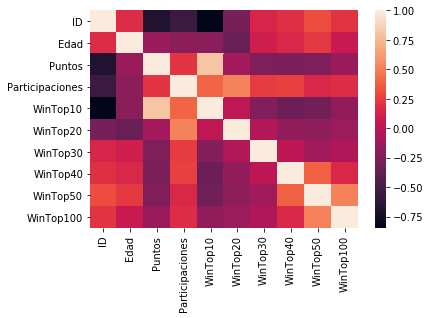

In [57]:
data_corr = data.corr()
sns.heatmap(data_corr)



In [58]:
data_corr



,ID,Edad,Puntos,Participaciones,WinTop10,WinTop20,WinTop30,WinTop40,WinTop50,WinTop100
ID,1.000000,0.183416,-0.683460,-0.564340,-0.846428,-0.280146,0.146156,0.193041,0.310084,0.209490
Edad,0.183416,1.000000,-0.138750,-0.197903,-0.211357,-0.348914,0.102994,0.150679,0.234831,0.064174
Puntos,-0.683460,-0.138750,1.000000,0.220554,0.806632,-0.092058,-0.249060,-0.276221,-0.248716,-0.136776
Participaciones,-0.564340,-0.197903,0.220554,1.000000,0.397202,0.518868,0.246162,0.259053,0.159876,0.180697
WinTop10,-0.846428,-0.211357,0.806632,0.397202,1.000000,0.020365,-0.237105,-0.340974,-0.318913,-0.172041
WinTop20,-0.280146,-0.348914,-0.092058,0.518868,0.020365,1.000000,-0.033041,-0.165966,-0.185897,-0.128388
WinTop30,0.146156,0.102994,-0.249060,0.246162,-0.237105,-0.033041,1.000000,0.013358,-0.104662,-0.041572
WinTop40,0.193041,0.150679,-0.276221,0.259053,-0.340974,-0.165966,0.013358,1.000000,0.386520,0.161089
WinTop50,0.310084,0.234831,-0.248716,0.159876,-0.318913,-0.185897,-0.104662,0.386520,1.000000,0.515526
WinTop100,0.209490,0.064174,-0.136776,0.180697,-0.172041,-0.128388,-0.041572,0.161089,0.515526,1.000000


 # Visualizando relación de puntajes y participaciones

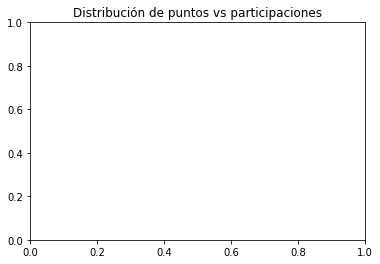

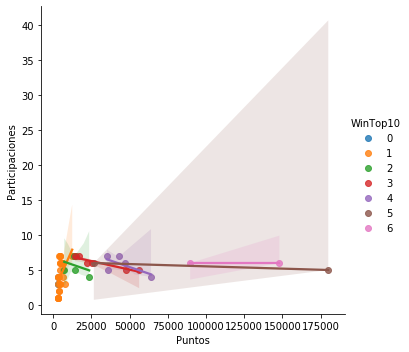

In [59]:
plt.title('Distribución de puntos vs participaciones')
sns.lmplot(x='Puntos', y='Participaciones', hue='WinTop10', data=data)
plt.show()



 # Obteniendo los datos de la atleta a buscar

In [60]:
nombre = data.loc[:, 'NombreAtleta'].str.contains('Maria Jose Rojas')
maria = data.loc[nombre]
maria



,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Participaciones,WinTop10,WinTop20,WinTop30,WinTop40,WinTop50,WinTop100
31,32,Maria Jose Rojas,24,CHI,4525,7,1,1,0,1,2,2


 hemos preparado el dataframe para usarlo en el modelo
 K-Means, ahora se debe seguir los pasos pertinentes para
 que los datos sean procesados correctamente por el modelo.

 # Preparando el modelo

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import preprocessing



 obteniendo los datos para el modelo

In [62]:
x = data.iloc[:, [2, 4, 5]].values
print(x)



[[    20 180000      5]
 [    12 148000      6]
 [    18  89600      6]
 [    27  64000      4]
 [    30  56240      5]
 [    18  47500      5]
 [    23  46670      6]
 [    22  42720      7]
 [    33  35730      5]
 [    13  35130      7]
 [    13  26560      6]
 [    19  25580      6]
 [    19  23530      4]
 [    21  22420      6]
 [    14  17100      7]
 [    15  15030      7]
 [    11  14480      5]
 [    12  14180      7]
 [    15  13910      7]
 [    15  12414      7]
 [    18   7667      3]
 [    28   7207      5]
 [    19   6710      6]
 [    26   6630      4]
 [    21   6488      5]
 [    25   5630      6]
 [    18   4796      6]
 [    27   4740      5]
 [    22   4574      7]
 [    18   4569      3]
 [    25   4535      6]
 [    24   4525      7]
 [    27   4524      7]
 [    17   4467      3]
 [    18   4250      6]
 [    29   3956      7]
 [    24   3800      2]
 [    29   3734      2]
 [    24   3560      4]
 [    31   3330      1]
 [    20   3330      1]
 [    14   3330 

 Buscando el número óptimos de grupos

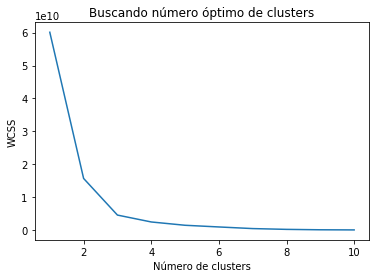

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Buscando número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()



In [64]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)



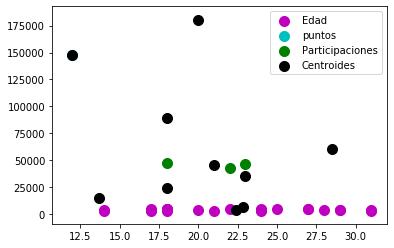

In [65]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'm', label = 'Edad')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'c', label = 'puntos')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Participaciones')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'k', label = 'Centroides')
plt.legend()


In [66]:
# dejando como caracteristicas la edad y las participaciones
X = data.iloc[:, [0, 2, 4, 5]]
print(X.sample(5))



    ID  Edad  Puntos  Participaciones
8    9    33   35730                5
49  50    18    2924                3
4    5    30   56240                5
5    6    18   47500                5
35  36    29    3956                7


In [67]:
# Seleccionando el puntaje como label
y = data.iloc[:, [1]]
print(y.sample(5))



        NombreAtleta
1        Rayssa Leal
17    Momiji Nishiya
25    Andrea Benitez
37       Helena Long
23  Samarria Brevard


 Preparando el modelo finalmente

In [68]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)



,ID,Edad,Puntos,Participaciones
2,-1.559158,-0.504831,1.971343,0.651514
29,0.311832,-0.504831,-0.481056,-0.924729
23,-0.103944,0.897478,-0.421615,-0.399315
3,-1.489862,1.072767,1.233008,-0.399315
26,0.103944,-0.504831,-0.474509,0.651514


 # Proyectando la participación

In [69]:
m = maria[['Edad', 'Puntos', 'Participaciones']]
y_pred = kmeans.predict(m)
nombre = maria['NombreAtleta'].values
probabilidad = 'no tiene' if y_pred[0] == 0 else 'aún posee'
sino = 'no' if y_pred[0] == 0 else ''
print('{0} {1} opciones para asistir a los juegos olímpicos de Tokio 2020, sus caracteristicas {2} lo permiten'.format(nombre, probabilidad, sino))
print('Caracteristicas actuales:')
maria



['Maria Jose Rojas'] no tiene opciones para asistir a los juegos olímpicos de Tokio 2020, sus caracteristicas no lo permiten
Caracteristicas actuales:


,ID,NombreAtleta,Edad,Nacionalidad,Puntos,Participaciones,WinTop10,WinTop20,WinTop30,WinTop40,WinTop50,WinTop100
31,32,Maria Jose Rojas,24,CHI,4525,7,1,1,0,1,2,2


 # Conclusión
 En este ejercicio se ha utilizado el modelo no supervisado de
 KMeans, el dataframe ha sido preparado para este tipo
 de modelo, generando variables que permitan a este
 poder predecir de mejor manera según los datos de una
 competidora en especial (**Maria Jose Rojas**)
 la cual será evaluada por el modelo según las
 características que posea.

 # Configuración utilizada para esta evaluación.
 CPython 3.7.6<br>
 IPython 7.13.0<br>
 compiler   : MSC v.1916 64 bit (AMD64)<br>
 system     : Windows<br>
 release    : 10<br>
 machine    : AMD64<br>
 processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel<br>
 CPU cores  : 12<br>
 interpreter: 64bit<br>